<a href="https://colab.research.google.com/github/Adityasingh675/Supervised-ML-Regression/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Mount the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sklearn
sklearn. __version__ 

'0.22.2.post1'

# Import necessary libraries and files

In [3]:
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [6]:
# Import the files
path_rossmann = '/content/drive/MyDrive/Almabetter/Rossmann Sales Prediction - Aditya Singh/data/Rossmann Stores Data.csv'
rossmann_stores_df = pd.read_csv(path_rossmann)

path_store = '/content/drive/MyDrive/Almabetter/Rossmann Sales Prediction - Aditya Singh/data/store.csv'
store_df = pd.read_csv(path_store)

# Data Cleaning, Visualisations and Correlations

## Checking Rossmann_stores_df

In [7]:
# Print shape of the Rossmann_Stores_df.
print('Rossmann_stores_df has {} rows'.format(rossmann_stores_df.shape[0]))
print('Rossmann_stores_df has {} columns'.format(rossmann_stores_df.shape[1]))

Rossmann_stores_df has 1017209 rows
Rossmann_stores_df has 9 columns


In [8]:
# Check info of the dataframe.
rossmann_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
# Check head of the dataframe.
rossmann_stores_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [10]:
# Check tail of the dataframe.
rossmann_stores_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [11]:
# Check description of the dataframe.
rossmann_stores_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2013-11-27,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [12]:
# Check the null values in the dataframe.
rossmann_stores_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values present in the rossmann_stores_df dataframe.

## Checking Store_df

In [13]:
# Check the number of rows and columns in the Store_df dataframe.
print('Store_df has {} rows'.format(store_df.shape[0]))
print('Store_df has {} columns'.format(store_df.shape[1]))

Store_df has 1115 rows
Store_df has 10 columns


In [14]:
# Check info of the dataframe.
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
# Check head of the dataframe.
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [16]:
# Check tail of the dataframe.
store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [17]:
# Check description of the dataframe.
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [18]:
# Check the null values in the dataframe.
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The store_df dataframe has null values in 6 columns which we will address after merging the two dataframes to create the final dataframe.

Merging the two dataframes based on the Store column.

In [19]:
# Merge both the dataframes- (rossmann_stores_df, store_df).
rossmann_df = pd.merge(left=rossmann_stores_df, right=store_df, on='Store', how='left')
rossmann_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


The rossmann_df will be the final dataframe I will be working with mostly through out this project.

I will make a copy of the rossmann_df and will perform all operations on that.

In [20]:
# Create a copy of the final dataframe.
rossmann_df_copy = rossmann_df.copy()

## Checking Rossmann_df_copy

In [21]:
# Check the number of columns and rows of the final dataframe- rossmann_df_copy.
print('Rossmann_df has {} rows'.format(rossmann_df_copy.shape[0]))
print('Rossmann_df has {} columns'.format(rossmann_df_copy.shape[1]))

Rossmann_df has 1017209 rows
Rossmann_df has 18 columns


In [22]:
# Check info of the dataframe.
rossmann_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [23]:
# Check head of the dataframe.
rossmann_df_copy.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [24]:
# Check tail of the dataframe.
rossmann_df_copy.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017199,1106,2,2013-01-01,0,0,0,0,a,1,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017200,1107,2,2013-01-01,0,0,0,0,a,1,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1017202,1109,2,2013-01-01,0,0,0,0,a,1,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [25]:
# Check description of the dataframe.
rossmann_df_copy.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2013-11-27,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


In [26]:
# Check the null values in the final dataframe.
rossmann_df_copy.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

From the above we can see that 6 columns have null values. However, 3 columns contain more than 50% of null values of their total values. I will deal with these null values at a later stage based on the distribution of the data in the particular column.

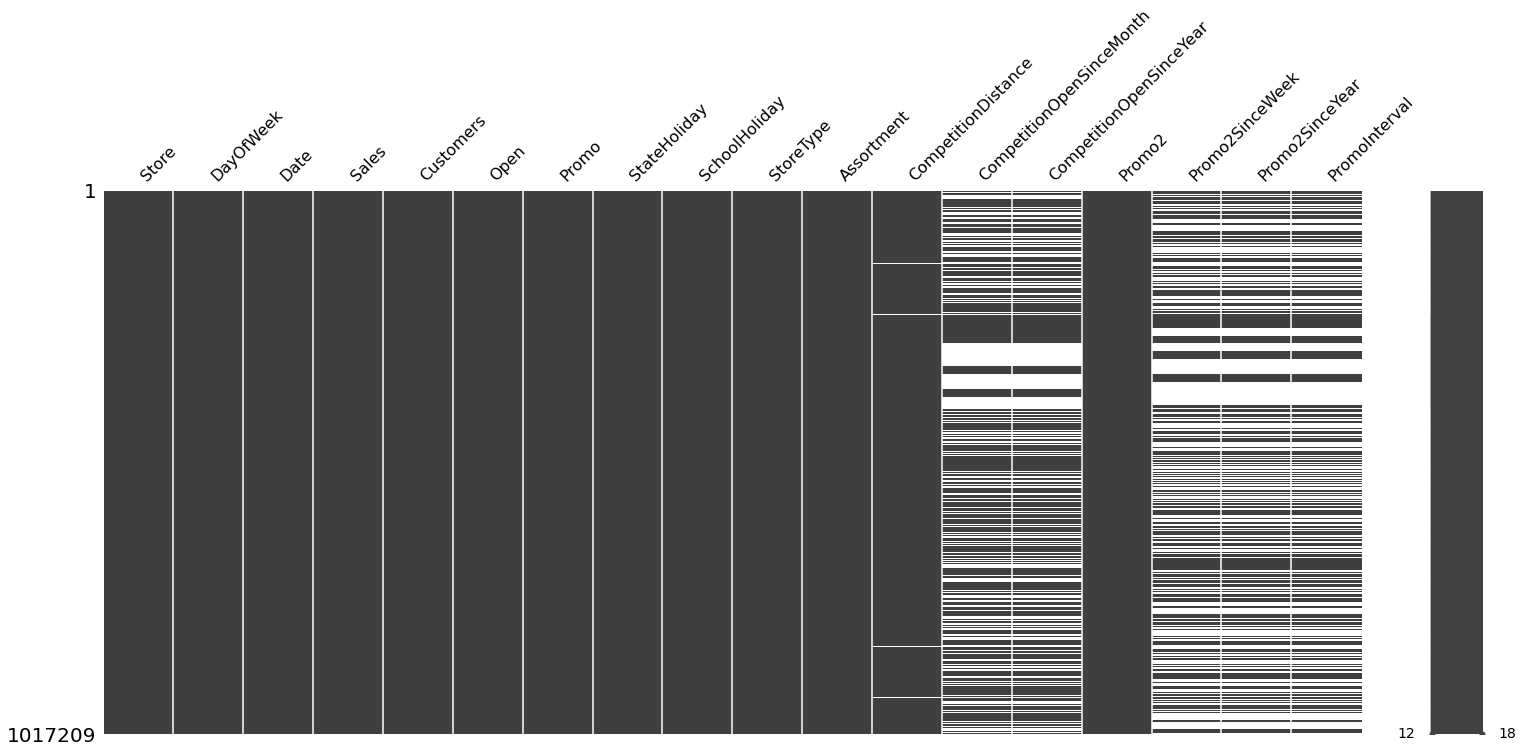

In [27]:
# Visualizing the null values of the dataset.
msno.matrix(rossmann_df_copy)

On visualising the null values of the final dataframe- rossmann_df_copy, we see that barring the CompetitionDistance column, the CompetitionOpenSinceMonth and CompetitionOpenSinceYear have identical missing value patterns as well as the rest three columns Promo2SinceWeek, Promo2SinceYear, PromoInterval have identical patterns among them as well. So, the last 3 columns indicate that there is a high chance that the pattern of the missing values is linked to the Promo2 column.

## Filter the Dataframe

In [28]:
# Check the columns of the dataframe.
rossmann_df_copy.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

As I am to predict the sales of the rossmann stores so the Customer column becomes very important as in the days where customers are 0, the sales of the store will be 0, but the inverse is not true. So, I will focus on the observations having greater than 0 customers for any given day.

In [29]:
# Filter out the observations where Customers are 0.
rossmann_df_final = rossmann_df_copy[(rossmann_df_copy['Customers'] > 0)]

In [30]:
# Convert the Date column from str type to datetime type.
rossmann_df_final['Date'] = rossmann_df_final['Date'].str.replace('-','')
rossmann_df_final['Date'] = pd.to_datetime(rossmann_df_final['Date'].replace(), format= '%Y%m%d')

In [31]:
# Check the count of each unique value in the Promo2 column.
rossmann_df_final.Promo2.value_counts()

0    423293
1    421047
Name: Promo2, dtype: int64

In [32]:
# Check the year since which most stores have started giving Promo2 coupons.
rossmann_df_final.Promo2SinceYear.value_counts()

2011.0    95036
2013.0    91854
2014.0    65757
2012.0    60712
2009.0    53824
2010.0    46412
2015.0     7452
Name: Promo2SinceYear, dtype: int64

From the above we can see that most of the promo2 coupon were started in the year 2011 and 2013.

In [33]:
# Check the counts of various Promo2 promo intervals.
rossmann_df_final['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     242398
Feb,May,Aug,Nov      97998
Mar,Jun,Sept,Dec     80651
Name: PromoInterval, dtype: int64

From the above we can see that the (Jan, Apr, Jul, Oct) set of months have the highest count of the promo intervals.

In [34]:
# Check the counts of StateHoliday types.
rossmann_df_final['StateHoliday'].value_counts()

0    731310
0    112120
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

Since StateHoliday column has two different types of 0 one is string and the other one is integer type, so we merge both of them to a single type having string 0.

In [35]:
# Change StateHoliday of type int - 0 to string - 0.
rossmann_df_final.loc[rossmann_df_final.StateHoliday == 0, 'StateHoliday'] = '0'

In [36]:
# Check the dataframe.
rossmann_df_final.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [37]:
# Get month name from the date column.
rossmann_df_final['Month'] = rossmann_df_final.Date.dt.month_name()

# Get year name from the date column.
rossmann_df_final['Year'] = rossmann_df_final.Date.dt.year

# Get day name from the date column.
rossmann_df_final['Day'] = rossmann_df_final.Date.dt.day_name()

In [38]:
# Reset the index.
rossmann_df_final.reset_index(drop='index', inplace=True)

In [39]:
# Check the dataframe.
rossmann_df_final

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,July,2015,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",July,2015,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",July,2015,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,July,2015,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,July,2015,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844335,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,January,2013,Tuesday
844336,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,January,2013,Tuesday
844337,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",January,2013,Tuesday
844338,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,January,2013,Tuesday


The last three columns Month, Year, Day which I have added is purely for Exploratory Data Analysis purpose.

## Exploratory Data Analysis

In [40]:
# Function to create bar plots 
def plot_bars(x, y, color, ci):
  figsize = plt.figure(figsize=(15,10))
  sns.set_style(style='darkgrid')
  sns.barplot(x= x, y= y, palette=color, ci=ci)

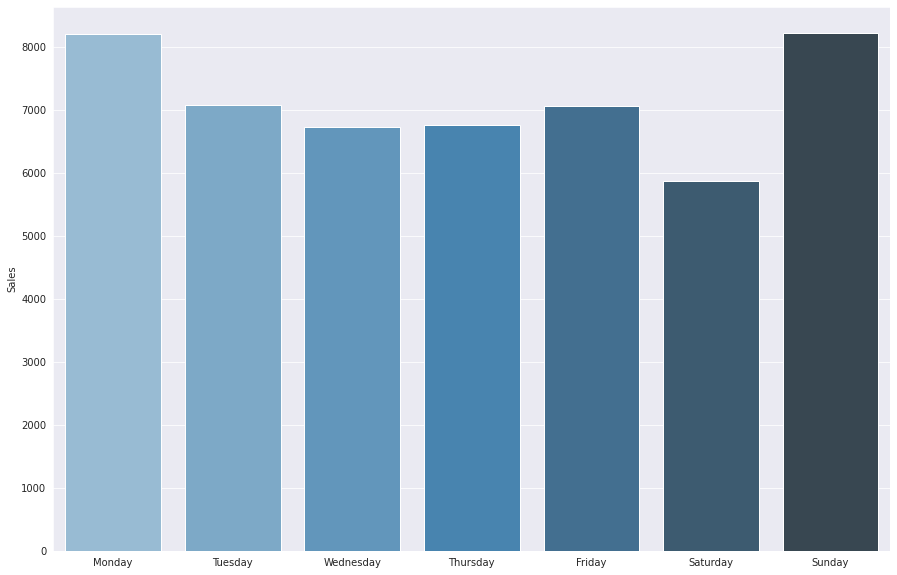

In [41]:
# Bar Plot of average sales against Days.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot_bars(x=pd.Categorical(rossmann_df_final['Day'], categories=days, ordered=True), y= rossmann_df_final['Sales'], color="Blues_d", ci=None)

This plot shows the average number of sales day-wise over the course of two years. From the plot shown above we can make some deductions:- <br>
1. We can see that the Sales show a decreasing trend from the start of the week that is Monday till the start of the weekend that is Saturday. 
2. But the sales suddenly pick up and clocks the highest on Sunday.


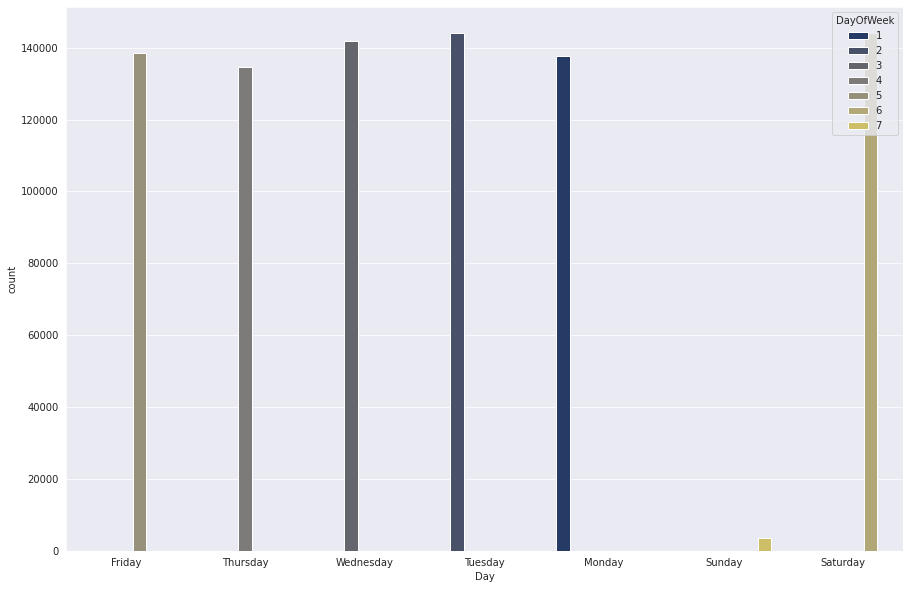

In [42]:
# Count plot of the total number of days the stores were open.
figsize = plt.figure(figsize=(15,10))
sns.countplot(x='Day',hue='DayOfWeek', data=rossmann_df_final, palette="cividis")

The above plot shows why the average sale on Sunday is the highest.
The reason is less number of stores are open on Sunday and suppose the number of sales is good on Sunday but still as the number of stores open in Sunday is significantly less than other days so the average is on the higher side.

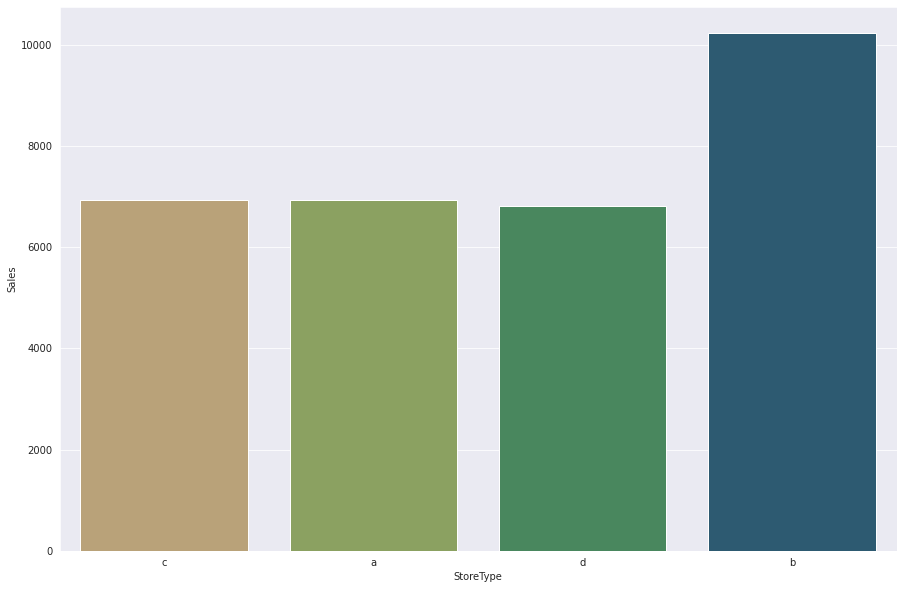

In [43]:
# Bar Plot of average sales against StoreType. 
plot_bars(x= rossmann_df_final['StoreType'], y= rossmann_df_final['Sales'], color="gist_earth_r", ci=None)

From the above plot we can see that ***Store type b*** has the highest average sales when compared to other three types of stores.

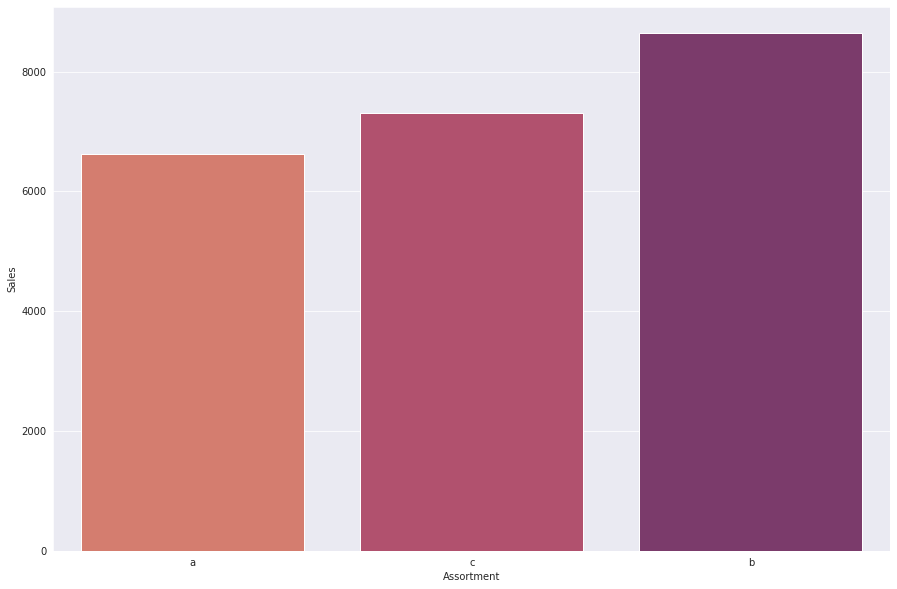

In [44]:
# Bar Plot of average sales against Assortment type. 
plot_bars(rossmann_df_final['Assortment'], y= rossmann_df_final['Sales'], color="flare", ci=None)

This bar graph shows that stores with ***Assortment type b*** have the highest average sale followed by ***type c*** and then ***type a***.

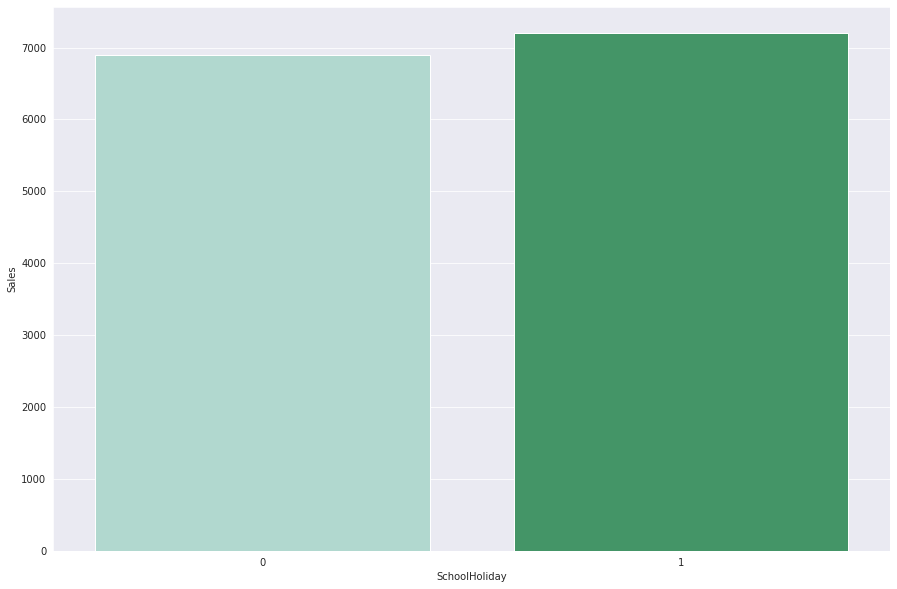

In [45]:
# Bar Plot of average sales against School holiday. 
plot_bars(rossmann_df_final['SchoolHoliday'], y= rossmann_df_final['Sales'], color="BuGn", ci=None)

From this bar plot we can see that whether it is a school holiday or not, it is not affecting the average sales of the stores by much.

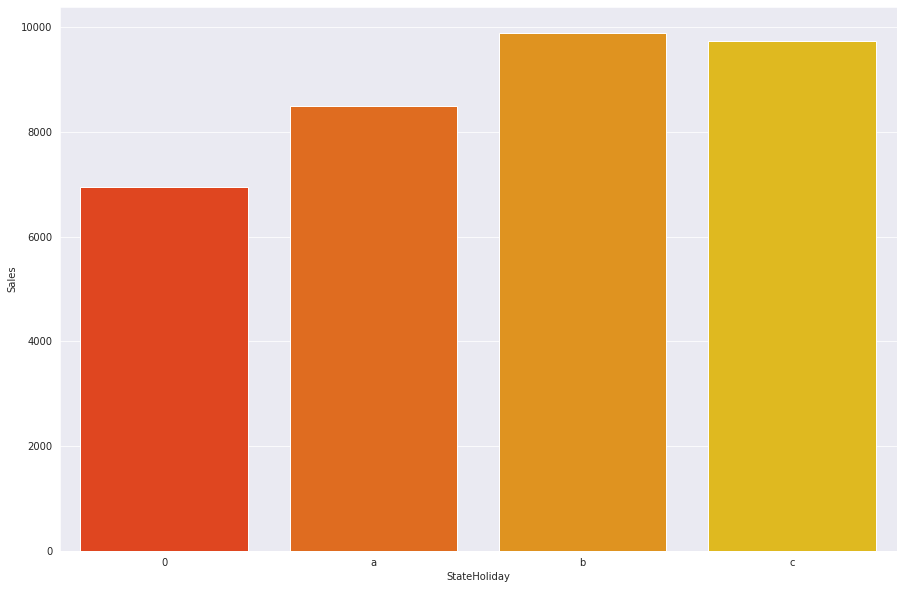

In [46]:
# Bar Plot of average sales against State holiday.
plot_bars(rossmann_df_final['StateHoliday'], y= rossmann_df_final['Sales'], color="autumn", ci=None)

From the above bar plot we can note some interesting observations :- <br>
1. When there is no State holiday, surprisingly the average sales of the stores are the lowest when compared to the holidays.
2. On Easter holiday the average sales of all the stores is the highest, followed closely by sales during the Christmas holiday and then public holidays.


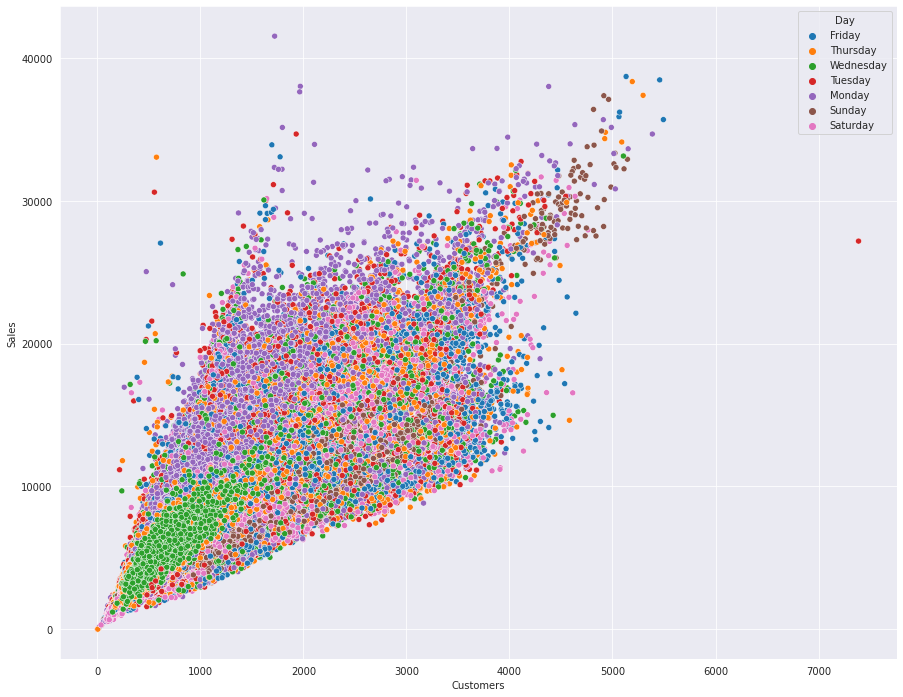

In [47]:
# Scatter plot of Sales with respect to Customers.
figsize = plt.figure(figsize=(15,12))
sns.scatterplot(data= rossmann_df_final, x='Customers', y='Sales', hue='Day')

The scatterplot shows how the Sales of the store varies with respect to the customers based on the days of the week.

From the above scatterplot we can see that one observation from each Monday and Tuesday clearly look as most prominent outliers but to arrive at any particular conclusion regarding the outliers we have to check the distribution of the Sales data.

In [48]:
# Function to plot Line plots.
def plot_line(data, x_axis, y_axis):
  figsize = plt.figure(figsize=(50,10))
  sns.lineplot(data= data, x=x_axis, y=y_axis, legend=True)

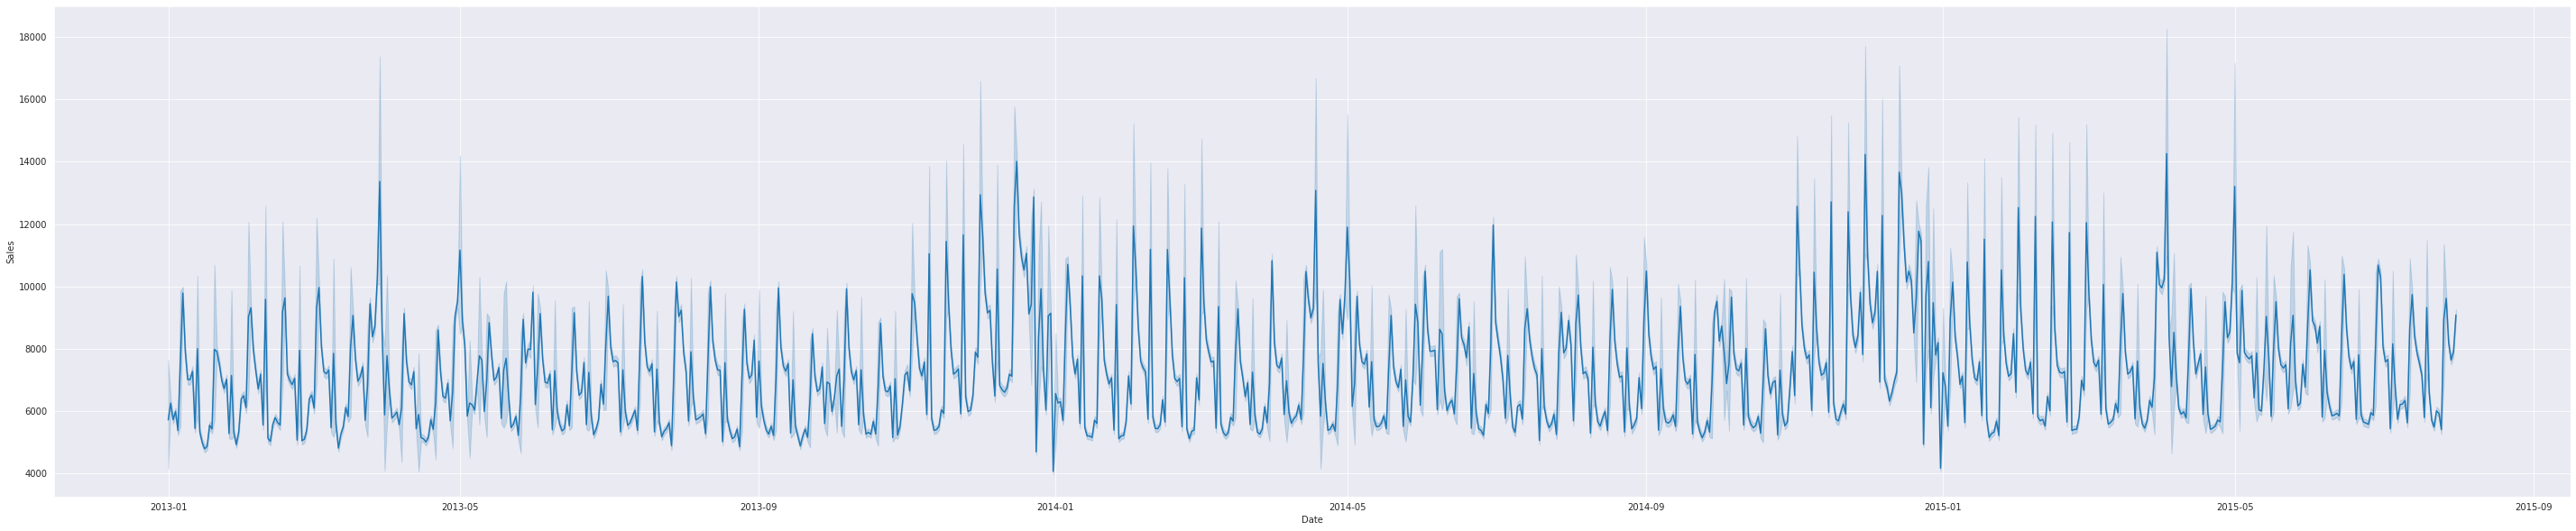

In [49]:
# Line plot of Sales with respect to Date.
plot_line(data = rossmann_df_final, x_axis ='Date', y_axis ='Sales')

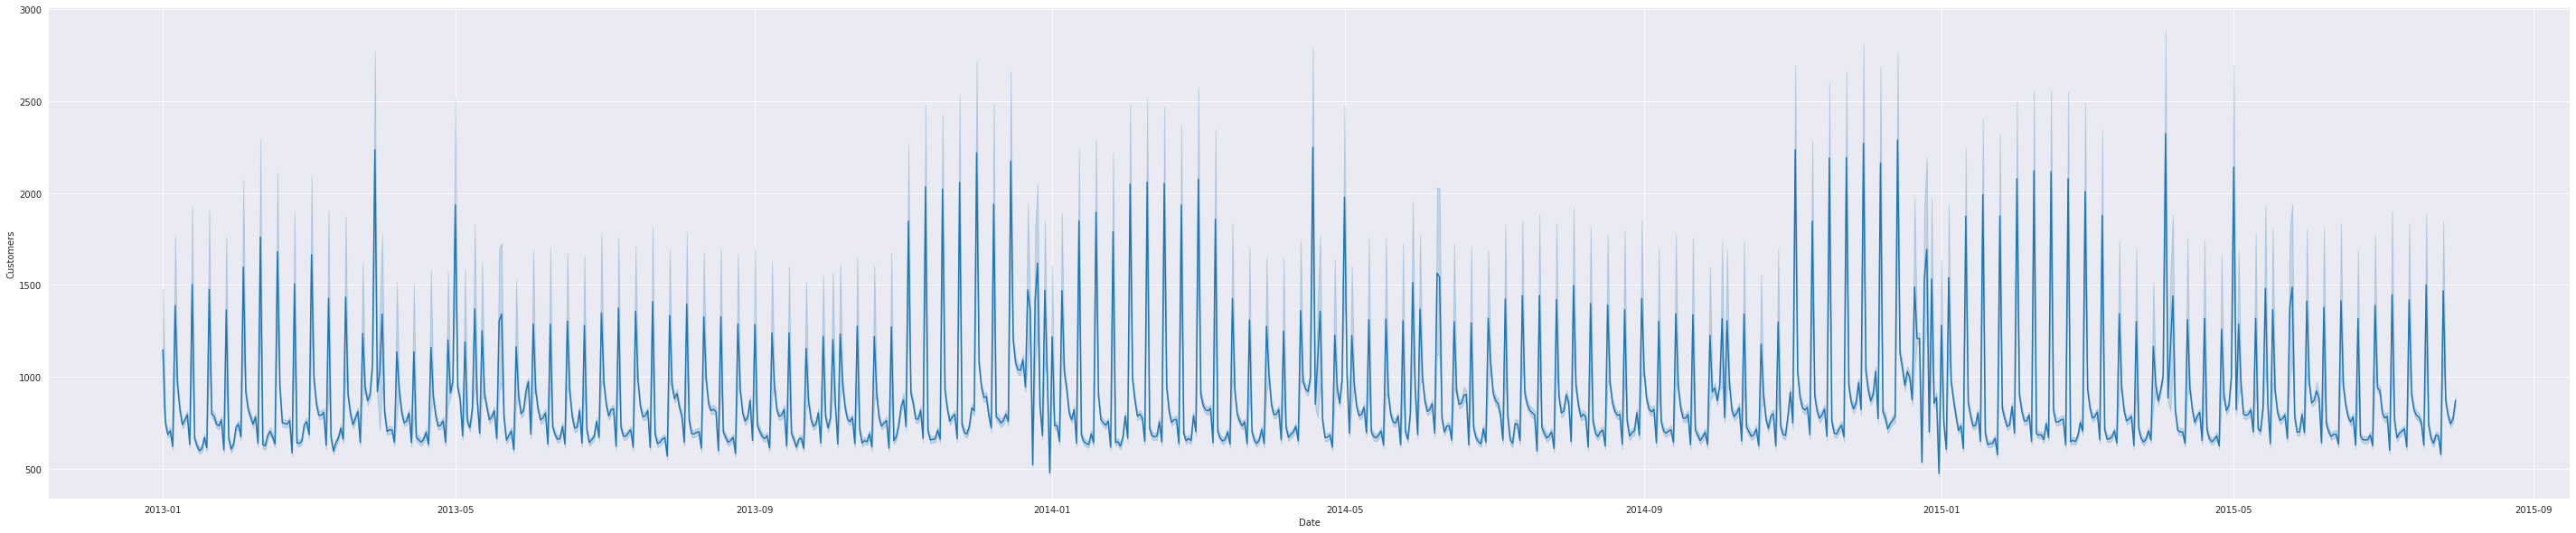

In [50]:
# Line plot of Customers with respect to Date.
plot_line(data = rossmann_df_final, x_axis ='Date', y_axis ='Customers')

The above two line plots showing how the number of Customers and Sales of stores have varied with time. 

From both of the above lineplots we can see that the trend is somewhat similar for both the cases, yet there are observations where :-
1. There are more number of customers and less Sales and 
2. More Sales and less number of Customers.

From this preliminary assumption we can see that it is possible to have contradictory values such that having low number of customers and high sales is totally possible and vice-versa. 

Next, we will look for NaNs in the data along with that do some feature engineering.

## Null Treatment and Feature Engineering

In [51]:
# Temporarily replace NaN values in Promo2SinceWeek and Promo2SinceYear columns with 0 which will be dealt with later.
rossmann_df_final[['Promo2SinceWeek','Promo2SinceYear']] = rossmann_df_final[['Promo2SinceWeek','Promo2SinceYear']].fillna(0)
rossmann_df_final['PromoInterval'] = rossmann_df_final['PromoInterval'].fillna('0')

In [52]:
# Function to create date from week and year.
def get_promo_start_date(week, year):

  from datetime import datetime, timedelta
  if week == 0 or year == 0:
    return '0'  
  else: 
    date = str(year) + '-W' + str(week)
    res = datetime.strptime(date + '-1', "%Y-W%W-%w")
    return res

In [53]:
# Extract promo2 start date into Promo2StatDate column as a string.
rossmann_df_final[['Promo2SinceWeek','Promo2SinceYear']] = rossmann_df_final[['Promo2SinceWeek','Promo2SinceYear']].astype(int)
rossmann_df_final['Promo2StartDate'] = rossmann_df_final.apply(lambda x: get_promo_start_date(x['Promo2SinceWeek'],x['Promo2SinceYear']), axis = 1) 

# Create a subset dataframe of observation where promo2 is running.
promos_df = rossmann_df_final[rossmann_df_final['Promo2'] == 1]
promos_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,Promo2StartDate
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13,2010,"Jan,Apr,Jul,Oct",July,2015,Friday,2010-03-29 00:00:00
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14,2011,"Jan,Apr,Jul,Oct",July,2015,Friday,2011-04-04 00:00:00
10,11,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,11.0,2011.0,1,1,2012,"Jan,Apr,Jul,Oct",July,2015,Friday,2012-01-02 00:00:00
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13,2010,"Jan,Apr,Jul,Oct",July,2015,Friday,2010-03-29 00:00:00
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45,2009,"Feb,May,Aug,Nov",July,2015,Friday,2009-11-09 00:00:00


In [54]:
# Create a NumberOfPromos column containing the number of promos run by that particular store in that particular time frame (Promo2StartDate till the latest date).
promos_df['Promo2StartDate'] = pd.to_datetime(promos_df['Promo2StartDate'])
promos_df['Date'] = pd.to_datetime(promos_df['Date'])

promos_df['DurationSincePromoStart'] = promos_df['Date'] - promos_df['Promo2StartDate']

promos_df['DurationSincePromoStart'] = promos_df['DurationSincePromoStart'].apply(lambda x: x if x > timedelta(0) else timedelta(0))
promos_df['DurationSincePromoStart'] = promos_df['DurationSincePromoStart'].astype(str)
promos_df['DurationSincePromoStart'] = promos_df['DurationSincePromoStart'].apply(lambda x: x[:-5])
promos_df['DurationSincePromoStart'] = promos_df['DurationSincePromoStart'].astype(int)
promos_df['NumberOfPromos'] = promos_df['DurationSincePromoStart']*4/365
promos_df['NumberOfPromos'] = promos_df['NumberOfPromos'].astype(int)

# Drop the DurationSincePromoStart column.
promos_df.drop('DurationSincePromoStart', axis = 1, inplace = True)

In [55]:
# Check head of the promos_df.
promos_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day,Promo2StartDate,NumberOfPromos
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13,2010,"Jan,Apr,Jul,Oct",July,2015,Friday,2010-03-29,21
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14,2011,"Jan,Apr,Jul,Oct",July,2015,Friday,2011-04-04,17
10,11,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,11.0,2011.0,1,1,2012,"Jan,Apr,Jul,Oct",July,2015,Friday,2012-01-02,14
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13,2010,"Jan,Apr,Jul,Oct",July,2015,Friday,2010-03-29,21
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45,2009,"Feb,May,Aug,Nov",July,2015,Friday,2009-11-09,22
13,14,5,2015-07-31,6544,710,1,1,0,1,a,a,1300.0,3.0,2014.0,1,40,2011,"Jan,Apr,Jul,Oct",July,2015,Friday,2011-10-03,15
14,15,5,2015-07-31,9191,766,1,1,0,1,d,c,4110.0,3.0,2010.0,1,14,2011,"Jan,Apr,Jul,Oct",July,2015,Friday,2011-04-04,17
16,17,5,2015-07-31,8430,946,1,1,0,1,a,a,50.0,12.0,2005.0,1,26,2010,"Jan,Apr,Jul,Oct",July,2015,Friday,2010-06-28,20
17,18,5,2015-07-31,10071,936,1,1,0,1,d,c,13840.0,6.0,2010.0,1,14,2012,"Jan,Apr,Jul,Oct",July,2015,Friday,2012-04-02,13
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22,2011,"Mar,Jun,Sept,Dec",July,2015,Friday,2011-05-30,16


In [56]:
# Drop the columns Promo2SinceWeek, Promo2SinceYear, Promo2StartDate.
promos_df.drop(['Promo2SinceWeek','Promo2SinceYear','Promo2StartDate'], axis = 1 ,inplace = True)

In [57]:
# Make a dataframe where Promo2 is not equal to 1. 
no_promos_df = rossmann_df_final[rossmann_df_final['Promo2']!=1]
no_promos_df.drop(['Promo2SinceWeek','Promo2SinceYear','Promo2StartDate'], axis = 1 ,inplace = True)
no_promos_df['NumberOfPromos'] = 0

In [58]:
# Join the promos_df and no_promos_df and creating a new dataframe.
rossmann_df_final = pd.concat([promos_df, no_promos_df], ignore_index=True)

In [59]:
# Check the shape of the new dataframe.
rossmann_df_final.shape

(844340, 20)

In [60]:
# Check the head of the new dataframe.
rossmann_df_final.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval,Month,Year,Day,NumberOfPromos
0,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,"Jan,Apr,Jul,Oct",July,2015,Friday,21
1,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,"Jan,Apr,Jul,Oct",July,2015,Friday,17
2,11,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,11.0,2011.0,1,"Jan,Apr,Jul,Oct",July,2015,Friday,14
3,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,"Jan,Apr,Jul,Oct",July,2015,Friday,21
4,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,"Feb,May,Aug,Nov",July,2015,Friday,22


In [61]:
# Check null values in the dataframe.
rossmann_df_final.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268602
CompetitionOpenSinceYear     268602
Promo2                            0
PromoInterval                     0
Month                             0
Year                              0
Day                               0
NumberOfPromos                    0
dtype: int64

In [62]:
# Convert Date column to datetime type.
rossmann_df_final['Date'] = pd.to_datetime(rossmann_df_final['Date'])
rossmann_df_final['Date'] = rossmann_df_final.Date.dt.strftime('%Y-%m-%d')

In [63]:
# Using CompetitionOpenSince Month and Year columns to get competition age.

# Substitute 0 for competition distance, open month and year for now. 
rossmann_df_final.fillna(0.0, inplace = True)

rossmann_df_final['CompetitionOpenSinceMonth'] = rossmann_df_final['CompetitionOpenSinceMonth'].astype(int).astype(str)
rossmann_df_final['CompetitionOpenSinceYear'] = rossmann_df_final['CompetitionOpenSinceYear'].astype(int).astype(str)
rossmann_df_final['CompetitionOpenDate'] = rossmann_df_final['CompetitionOpenSinceYear'] + rossmann_df_final['CompetitionOpenSinceMonth'] + '01'

latest_date = str(rossmann_df_final.Date.max()[:10]).replace('-','')

rossmann_df_final.loc[(rossmann_df_final.CompetitionOpenDate == '0001'), 'CompetitionOpenDate'] = latest_date
rossmann_df_final['CompetitionOpenDate'] = pd.to_datetime(rossmann_df_final['CompetitionOpenDate'], format='%Y%m%d')
rossmann_df_final['CompetitionOpenDate'] = pd.to_datetime(rossmann_df_final['CompetitionOpenDate'])

# Get number of days since the competition first opened.
rossmann_df_final['Date'] = pd.to_datetime(rossmann_df_final['Date'])
rossmann_df_final['CompetitionAge'] = rossmann_df_final['Date'] - rossmann_df_final['CompetitionOpenDate']

# Converting timedelta variable competition age to integer.
rossmann_df_final['CompetitionAge'] = rossmann_df_final['CompetitionAge'].astype(str)

rossmann_df_final['CompetitionAge'] = rossmann_df_final['CompetitionAge'].apply(lambda x: x[:-5])
rossmann_df_final['CompetitionAge'] = rossmann_df_final['CompetitionAge'].astype(int)

rossmann_df_final['CompetitionAge'] = rossmann_df_final['CompetitionAge'].apply(lambda x: 0 if x <= 0 else x)

In [64]:
# Drop columns Store, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, CompetitionOpenDate.
rossmann_df_final.drop(['Store','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','CompetitionOpenDate'], axis = 1, inplace = True)

In [65]:
# Replace 0 Competition Age and Distance with median.
rossmann_df_final.loc[rossmann_df_final.CompetitionDistance == 0, 'CompetitionDistance'] = rossmann_df_final.CompetitionDistance.median()
rossmann_df_final.loc[rossmann_df_final.CompetitionAge	 == 0, 'CompetitionAge'] = rossmann_df_final.CompetitionAge.median()

In [66]:
# Check the head of the dataframe.
rossmann_df_final.head(5)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Month,Year,Day,NumberOfPromos,CompetitionAge
0,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",July,2015,Friday,21,2829
1,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",July,2015,Friday,17,3164
2,5,2015-07-31,10457,1236,1,1,0,1,a,c,960.0,1,"Jan,Apr,Jul,Oct",July,2015,Friday,14,1368
3,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,1,"Jan,Apr,Jul,Oct",July,2015,Friday,21,505
4,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,1,"Feb,May,Aug,Nov",July,2015,Friday,22,505


In [67]:
# Make a list of categorical variables.
categorical_cols = []

for col in rossmann_df_final.columns:
  if col not in rossmann_df_final.describe().columns:
    print(col, rossmann_df_final[col].unique())
    categorical_cols.append(col)

Date ['2015-07-31T00:00:00.000000000' '2015-07-30T00:00:00.000000000'
 '2015-07-29T00:00:00.000000000' '2015-07-28T00:00:00.000000000'
 '2015-07-27T00:00:00.000000000' '2015-07-26T00:00:00.000000000'
 '2015-07-25T00:00:00.000000000' '2015-07-24T00:00:00.000000000'
 '2015-07-23T00:00:00.000000000' '2015-07-22T00:00:00.000000000'
 '2015-07-21T00:00:00.000000000' '2015-07-20T00:00:00.000000000'
 '2015-07-19T00:00:00.000000000' '2015-07-18T00:00:00.000000000'
 '2015-07-17T00:00:00.000000000' '2015-07-16T00:00:00.000000000'
 '2015-07-15T00:00:00.000000000' '2015-07-14T00:00:00.000000000'
 '2015-07-13T00:00:00.000000000' '2015-07-12T00:00:00.000000000'
 '2015-07-11T00:00:00.000000000' '2015-07-10T00:00:00.000000000'
 '2015-07-09T00:00:00.000000000' '2015-07-08T00:00:00.000000000'
 '2015-07-07T00:00:00.000000000' '2015-07-06T00:00:00.000000000'
 '2015-07-05T00:00:00.000000000' '2015-07-04T00:00:00.000000000'
 '2015-07-03T00:00:00.000000000' '2015-07-02T00:00:00.000000000'
 '2015-07-01T00:00:0

In [68]:
# Creating a copy of the rossmann_df_final dataframe without handling the Categorical variables in order to fit the Catboost Model.
rossmann_df_final_catboost = rossmann_df_final.copy()

# Drop unnecessary columns which are not required for the analysis.
rossmann_df_final_catboost = rossmann_df_final_catboost.drop(columns=['Date', 'Month', 'Year', 'Day', 'Open', 'Promo2'])

# Move Sales column to the end of the dataframe.
sales_df = rossmann_df_final_catboost['Sales']
rossmann_df_final_catboost = rossmann_df_final_catboost.drop(columns=['Sales'])
rossmann_df_final_catboost = pd.concat([rossmann_df_final_catboost, sales_df], axis=1)

In [69]:
rossmann_df_final_catboost.columns

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance', 'PromoInterval',
       'NumberOfPromos', 'CompetitionAge', 'Sales'],
      dtype='object')

## Outliers

In [70]:
# Drop the Month, Year and Day columns as they are no longer required.
rossmann_df_final=rossmann_df_final.drop(columns=['Month', 'Year', 'Day', 'Date'])

# Get the columns having dtypes as object or categorical data.
cat_features = rossmann_df_final.describe(include=['object','category']).columns

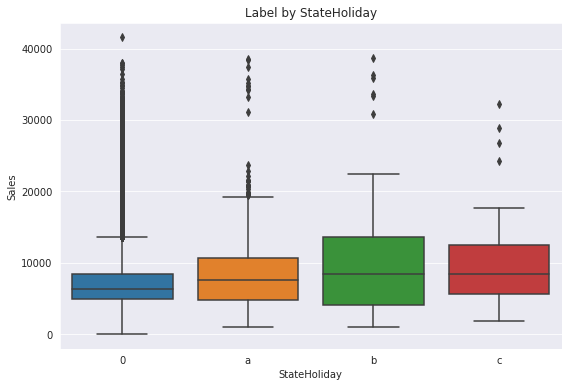

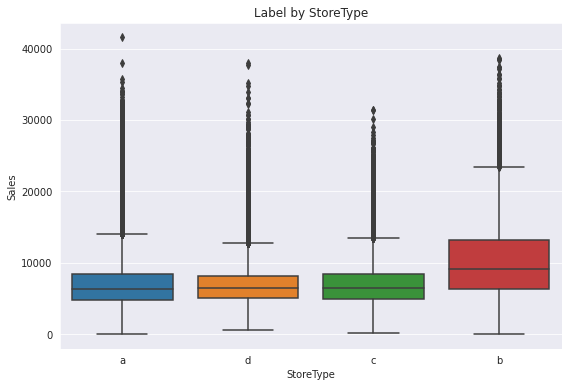

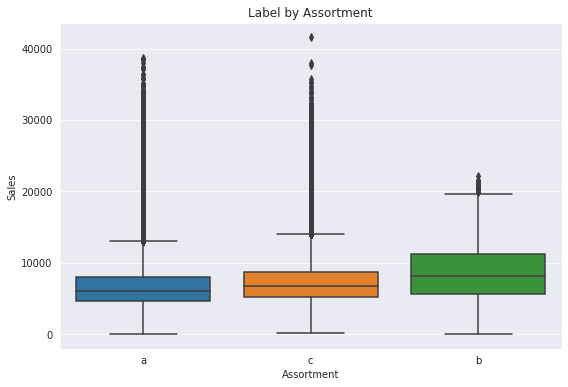

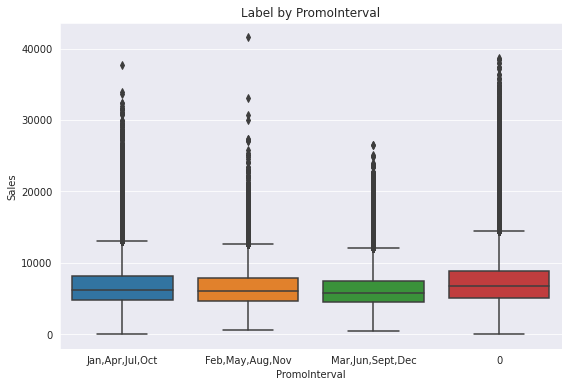

In [71]:
# Box-plot for all the categorical variables to get an idea regarding the outlier distribution.
for col in cat_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(y='Sales', x=col, data=rossmann_df_final, ax=ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")

These box plots show the outliers (Sales) corresponding to the various categories in the data.

Next let's check the percent of outliers in the data with respect to the features.

Most categories have values less than 20000 for sales but some have upto 25000 so, we will assume the sales value above 25000 as outlier. But, there is also a very high chance of the sales figure not being an outlier given the store having a high number of customers and there is also the likelihood of having high number of sales with a bit less number of customers also. So, we will first have a rough check of how many/what percentage of the observations fall into the outlier category.

In [72]:
# Number of observations that may be potential outliers.
len(rossmann_df_final[rossmann_df_final['Sales'] > 25000])

# Percentage of potential outliers in the dataframe.
percent_of_outlier = (len(rossmann_df_final[rossmann_df_final['Sales'] > 25000])/len(rossmann_df_final)) * 100
print('Percent of potential outliers in the data is: {}'.format(percent_of_outlier))

Percent of potential outliers in the data is: 0.08977426155340267


The percent of potential outliers comes out to be very few that is 0.09 % but as I have described above, there is a high chance of a store having low number of customers but high number of sales and vice-versa. So, it will be potentially risky to remove some outliers, so in this case we will keep the outliers for our modelling and prediction purposes.

## Label Encoding

In [73]:
# Create a list of categorical variables.
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [74]:
# Label Encoding the Categorical variables. 
for col in categorical_cols:
  i = 0
  sub_dict = {}
  for var in rossmann_df_final[col].unique():
     sub_dict[var] = i
     i += 1
  rossmann_df_final[col] = rossmann_df_final[col].map(sub_dict)

rossmann_df_final.head()


,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,NumberOfPromos,CompetitionAge
0,5,6064,625,1,1,0,1,0,0,570.0,1,0,21,2829
1,5,8314,821,1,1,0,1,0,0,14130.0,1,0,17,3164
2,5,10457,1236,1,1,0,1,0,1,960.0,1,0,14,1368
3,5,8959,962,1,1,0,1,0,1,1070.0,1,0,21,505
4,5,8821,568,1,1,0,0,1,0,310.0,1,1,22,505


In [75]:
# One hot encoding the categorical features.
# rossmann_df_final = pd.get_dummies(rossmann_df_final, columns=["StoreType", "Assortment", "StateHoliday", "PromoInterval"], prefix=["store_type", "assortment_type","state_holiday","promo_interval"])
# rossmann_df_final

## Correlation Matrix

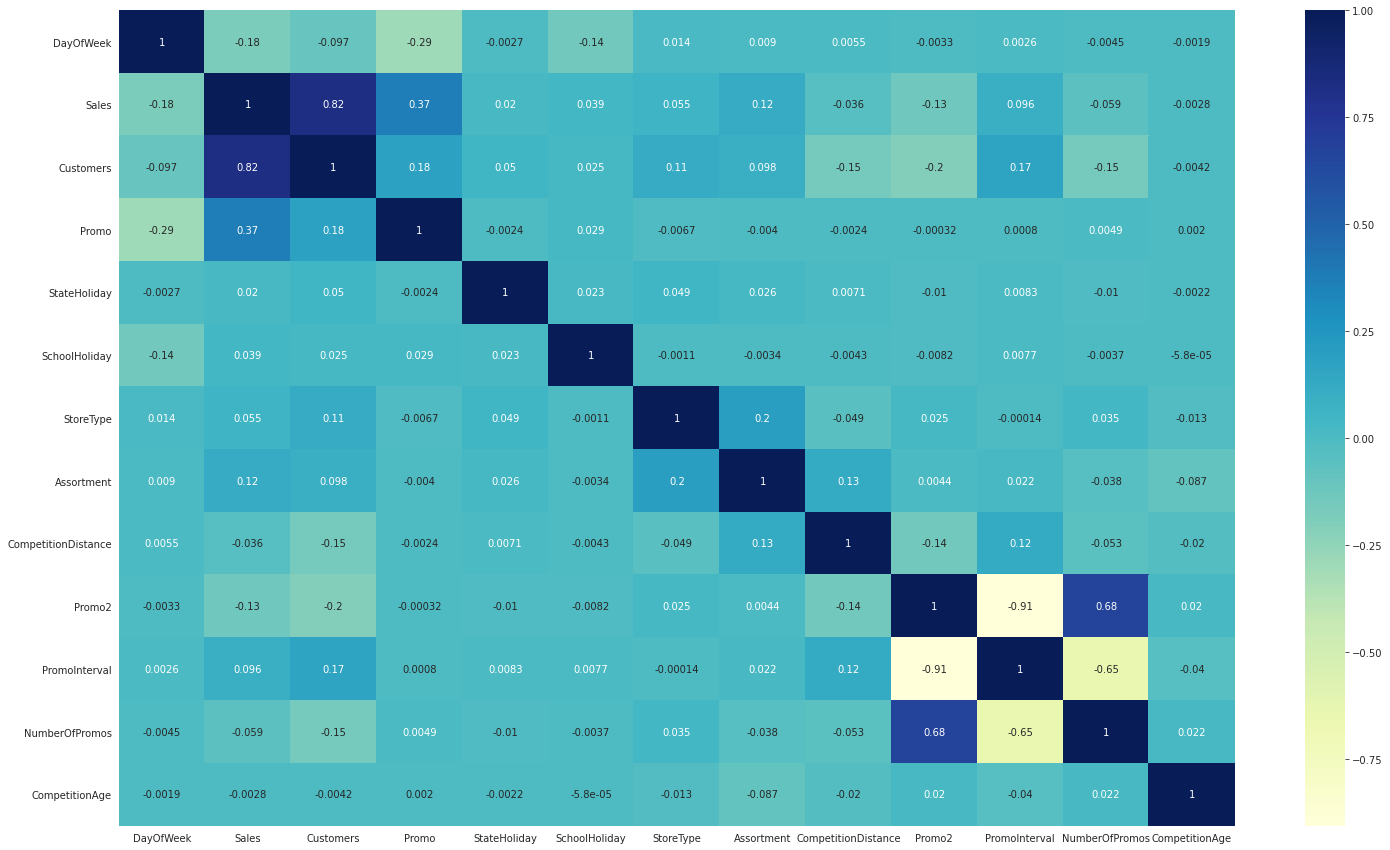

In [76]:
# Check the correlation between all the features in the final dataframe to be fitted to the model.
# rossmann_df_final = rossmann_df_final[['DayOfWeek', 'Sales', 'Customers', 'Promo',
#        'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'NumberOfPromos',
#        'CompetitionAge', 'store_type_a',
#        'store_type_b', 'store_type_c', 'store_type_d', 'assortment_type_a',
#        'assortment_type_b', 'assortment_type_c', 'state_holiday_0',
#        'state_holiday_a', 'state_holiday_b', 'state_holiday_c',
#        'promo_interval_0', 'promo_interval_Feb,May,Aug,Nov',
#        'promo_interval_Jan,Apr,Jul,Oct', 'promo_interval_Mar,Jun,Sept,Dec']]



# Drop the Open column from the dataset as it will give null values as it is not varying.
rossmann_df_final = rossmann_df_final.drop(columns=['Open'])

# Correlation among dependent and independent variables in the final dataset.
plt.figure(figsize=(25,15))
sns.heatmap(rossmann_df_final.corr(), cmap='YlGnBu', annot=True)

Insights from the above correlation matrix: <br>
  1. NumberOfPromos showing high correlation with Promo2 column.
So, we need to deal with these columns and look for solutions to reduce the correlation between them or remove them.   
  2. Customers and Promo showing high correlation with Sales which is desirable and this also shows that with a correlation of ***0.82*** between Customers and Sales column, the Customer column plays a vital role in predicting the Sales of a particular store.

Let's visualize the dependent variable column - Sales

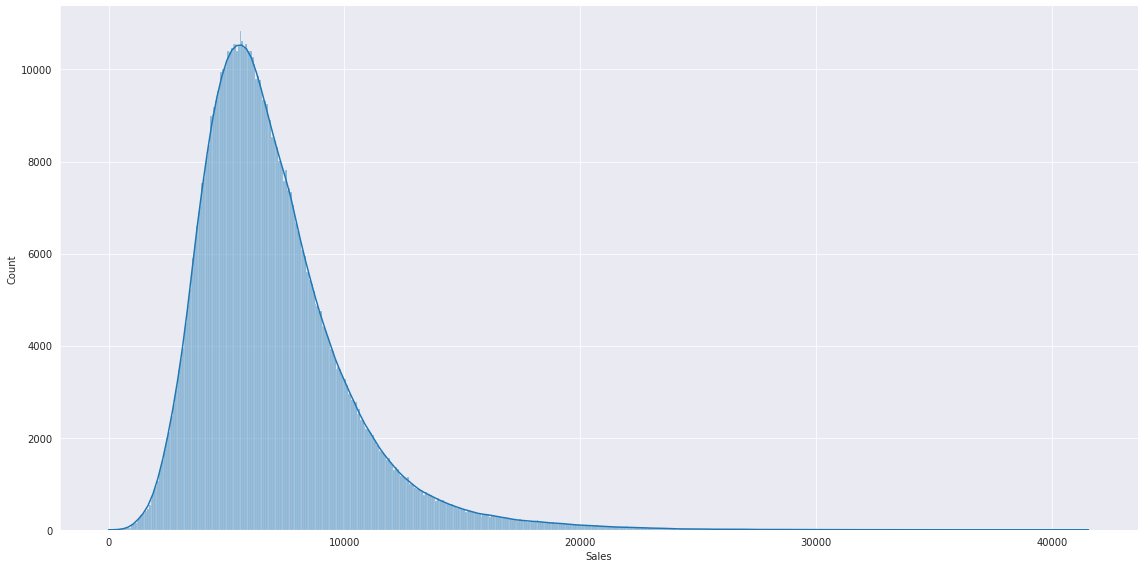

In [77]:
# Visualisation of the Sales column.
sns.displot(rossmann_df_final['Sales'], kde=True, height=8, aspect=2)

The above displot shows that our dependent variable is **right-skewed** (positive skewwed) but the skewness is moderate which can be taken care of by doing a **Square-root transform** of the Sales column. From the above plot we can get some insights as noted below :-      
1. Very small number of samples are above 20000.
2. The Median of the distribution is around 5000.
3. Greater than 95% of samples lie at a range of less than 20000 sales.

In [78]:
# Check skew and kurtosis of the Sales column.
pd.DataFrame(rossmann_df_final['Sales'].agg(['skew', 'kurtosis']).transpose())

,Sales
skew,1.594892
kurtosis,4.853952


As we can see from the above that the dependent variable has a skew of 1.59 which is high but not that high to apply log transformation, hence we will apply square root transform to check if it reduces the skewness of the dependent variable distribution.

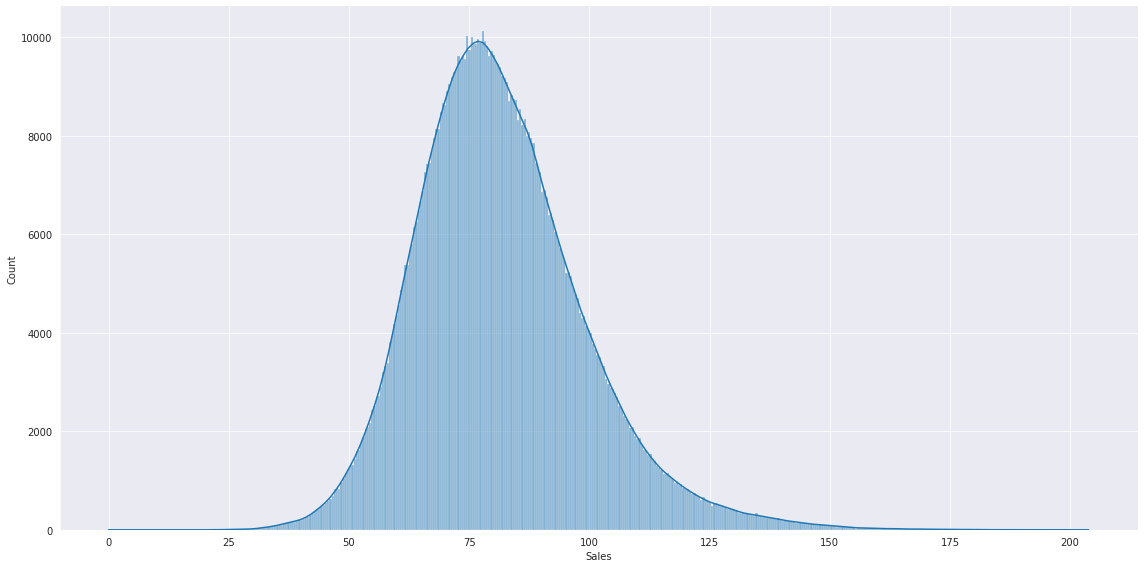

In [79]:
# Apply the Square-root transform on the dependent variable- Sales column.
sns.displot(data=np.sqrt(rossmann_df_final['Sales']), kde=True, height=8, aspect=2)

In [80]:
# Check skew and kurtosis of the Sales column.
pd.DataFrame(np.sqrt(rossmann_df_final['Sales']).agg(['skew', 'kurtosis']).transpose())

,Sales
skew,0.700975
kurtosis,1.271187


As we can see the skewness of the distribution is fixed giving a near perfect normal distribution. Although, there is still a bit of skew in the distribution but it is manageable.

Next, we will check the variation inflation factor for all the independent variables.

### Variation Inflation Factor

In [81]:
# Function to calculate VIF for all the variables.
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [82]:
# Function gives the value of the VIF of all the variables in the dataset.
calc_vif(rossmann_df_final[[i for i in rossmann_df_final.describe().columns if i not in ['Sales']]])

,variables,VIF
0,DayOfWeek,4.934445
1,Customers,4.661114
2,Promo,1.977649
3,StateHoliday,1.006138
4,SchoolHoliday,1.249196
5,StoreType,1.754362
6,Assortment,2.037497
7,CompetitionDistance,1.565366
8,Promo2,5.190816
9,PromoInterval,5.821507


It has been specified that if a variable/feature has a VIF value ***VIF > 5***, then it results in high multicollinearity. Hence, those variables must be removed or dealt with before fitting the data to the model in order for the model to work efficiently.

In [83]:
# Remove features having high VIF.
# rossmann_df_final = rossmann_df_final.drop(columns=['promo_interval_0', 'assortment_type_a', 'assortment_type_c', 'store_type_a', 'store_type_c', 'store_type_d', 'Promo2'])

Here, I will remove Promo2 column and check the VIF again.

In [84]:
# Drop Promo2 against PromoInterval as PromoInterval is a derived column from Promo2.  
rossmann_df_final = rossmann_df_final.drop(columns=['Promo2'])

In [85]:
# Check the VIF again.
calc_vif(rossmann_df_final[[i for i in rossmann_df_final.describe().columns if i not in ['Sales']]])

,variables,VIF
0,DayOfWeek,3.836163
1,Customers,4.420909
2,Promo,1.872940
3,StateHoliday,1.005790
4,SchoolHoliday,1.227202
5,StoreType,1.740363
6,Assortment,1.979320
7,CompetitionDistance,1.562012
8,PromoInterval,3.983432
9,NumberOfPromos,1.939782


The above set of features are the one that I will be fitting into the models for prediction.

In [86]:
# Move the Sales column to the last of the dataframe.
df_Sales = rossmann_df_final['Sales']
rossmann_df_final = rossmann_df_final.drop(columns=['Sales'])
rossmann_df_final = pd.concat([rossmann_df_final, df_Sales], axis=1)
rossmann_df_final

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,PromoInterval,NumberOfPromos,CompetitionAge,Sales
0,5,625,1,0,1,0,0,570.0,0,21,2829,6064
1,5,821,1,0,1,0,0,14130.0,0,17,3164,8314
2,5,1236,1,0,1,0,1,960.0,0,14,1368,10457
3,5,962,1,0,1,0,1,1070.0,0,21,505,8959
4,5,568,1,0,0,1,0,310.0,1,22,505,8821
...,...,...,...,...,...,...,...,...,...,...,...,...
844335,2,777,0,1,1,3,2,1410.0,3,0,1583,3821
844336,2,566,0,1,1,3,0,150.0,3,0,2314,3375
844337,2,2377,0,1,1,3,2,860.0,3,0,4841,10765
844338,2,1039,0,1,1,3,2,1430.0,3,0,505,4491


# Data Preparation for Model Building.

The independent variables/columns which I will use to fit the model on are DayOfWeek, Customers, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, PromoInterval, NumberOfPromos and CompetitionAge.

The dependent column includes the Sales column.

In [87]:
# Separate the data into independent and dependent variables. 

# Here, X contains the independent variables.
X = rossmann_df_final.iloc[:,:-1]

# Here, y contains the dependent variables.
y = rossmann_df_final.iloc[:,-1]

# Since y is right skewwed so we will apply square root transform on y in order to fix the skewness.
y = np.sqrt(y)

In [88]:
# Split the data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Next, I will use Robust Scaler to scale the data as the centering and scaling statistics of RobustScaler is based on percentiles and are therefore not influenced by a few number of very large marginal outliers which is just our case with the dataset.

In [89]:
# Scale the data using RobustScaler.

# Instantiate a robust_scaler object from the RobustScaler class.
robust_scaler = RobustScaler()

# Fit-transform the robust_scaler object upon the X_train data so, that it learns the mean and standard deviation from the X_train data distribution.
X_train = robust_scaler.fit_transform(X_train)

# Apply the transform method for robust_scaler object to transform the X_test data.
X_test = robust_scaler.transform(X_test)

# Model Building and Validation

## Fitting Linear Regression Model

In [90]:
# Fuction to calculate the metrics of a model.

def calc_metric(data, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):

  # Calculate the Mean Squared Error for both train and test set.
  mean_squared_error_train = mean_squared_error(y_train**2, y_pred_train**2)
  mean_squared_error_test = mean_squared_error(y_test**2, y_pred_test**2)
  # return f'Mean Squared Error for train set is {mean_squared_error_train} and test set is {mean_squared_error_test}.'

  # Calculate the Root Mean Squared Error for both train and test set.
  root_mean_squared_error_train = np.sqrt(mean_squared_error_train)
  root_mean_squared_error_test = np.sqrt(mean_squared_error_test)
  # return f'Root Mean Squared Error for train set is {root_mean_squared_error_train} and test set is {root_mean_squared_error_test}.'

  # Calculate the Mean Absolute Error for both train and test set.
  mean_absolute_error_train = mean_absolute_error(y_train**2, y_pred_train**2)
  mean_absolute_error_test = mean_absolute_error(y_test**2, y_pred_test**2)
  # return f'Mean Absolute Error for train set is {mean_absolute_error_train} and test set is {mean_absolute_error_test}.'

  # Calculate R2 Score for both train and test set.
  r2_score_train = r2_score(y_train**2, y_pred_train**2)
  r2_score_test = r2_score(y_test**2, y_pred_test**2)
  # return f'R2 Score for train set is {r2_score_train} and test set is {r2_score_test}.'

  # Calculate Adjusted R2 Score for both train and test set.
  adjusted_r2_score_train = 1 - (((len(X_train) - 1) / (len(X_train) - len(data.columns) - 1)) * (1 - r2_score_train))
  adjusted_r2_score_test = 1 - (((len(X_test) - 1) / (len(X_test) - len(data.columns) - 1)) * (1 - r2_score_test))


  return f'''Mean Squared Error for train set is {mean_squared_error_train} and test set is {mean_squared_error_test}.
Root Mean Squared Error for train set is {root_mean_squared_error_train} and test set is {root_mean_squared_error_test}.
Mean Absolute Error for train set is {mean_absolute_error_train} and test set is {mean_absolute_error_test}.
R2 Score for train set is {r2_score_train} and test set is {r2_score_test}.
Adjusted R2 Score for train set is {adjusted_r2_score_train} and test set is {adjusted_r2_score_test}.'''

I will then fit a plain Linear Regression Model with default parameters to see how it performs on this dataset.

In [91]:
def linear_regression(data, X_train, X_test, y_train, y_test):
  # Instantiate a lin_reg object from the LinearRegression class. 
  lin_reg = LinearRegression(n_jobs = -1)

  # Fit the lin_reg model on the data.
  lin_reg.fit(X_train, y_train)

  # Predict the dependent variable for X_train.
  y_pred_train = lin_reg.predict(X_train)

  # Predict the dependent variable for X_test.
  y_pred_test = lin_reg.predict(X_test)

  # Check the intercept of the regression equation.
  print('The intercept for this linear regression model is {}.'.format(lin_reg.intercept_))

  # Check the coefficients of the regression equation.
  print('The coefficients for this particular model includes {}.'.format(lin_reg.coef_))

  # Calculate the metrics for the model.
  metrics = calc_metric(data=data, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

  # Print the metric scores.
  print(metrics)

In [92]:
# Compute the metric scores for linear regression.
linear_regression(data=rossmann_df_final, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

The intercept for this linear regression model is 73.15357891994597.
The coefficients for this particular model includes [-1.30431379 12.58948816  8.39800392 -9.00664665  0.46724523 -0.7197642
  1.74825144  1.10025345 -0.41468001  1.45554513  0.02544105].
Mean Squared Error for train set is 3139462.8384764497 and test set is 3190564.946468752.
Root Mean Squared Error for train set is 1771.8529392916473 and test set is 1786.215257596002.
Mean Absolute Error for train set is 1172.7029387411399 and test set is 1179.3351841972878.
R2 Score for train set is 0.6734232780259607 and test set is 0.6716092709593564.
Adjusted R2 Score for train set is 0.673417476162837 and test set is 0.6715859332509765.


The Adjusted R2 scores for the Linear Regression model for ***train set - 0.673*** and ***test set - 0.671*** tells us that clearly the model is ***underfitting*** the data having, ***High Bias***, as it is not picking up the inherent patterns in the data. So, we will have to look into other models which can get a hold of the intricate patterns in the data.

Since the Linear Regression model is underfitting the data, I will be using Boosted Trees for building other models to check out how well the boosted models are able to describe the underlying variance in the data. 

Reason why I will not be using Decision Trees or Bagging Technique is that for :- 

Decision trees - They are prone to over-fitting when grown till higher depth and when using low/shallow depth trees there predictions are not accurate or r2 score is on the lower side but I will use ***Decision Tree*** to check how it performs on this data.

Ensemble Technique / Random Forest / Bagging - Though Random forests tend to solve the problem of over-fitting, they fail to predict beyond a range of the dataset for regression based problems.

Hence, I am choosing Boosting techniques and will fit the following models to the data :-

1. XGBoost
2. LightGBM
3. CatBoost

Why I am refraining from using AdaBoost and GradientBoosted Trees is due to the slow speed of the algorithms as compared to the former three. 

Moreover, XGBoost has many advantages over AdaBoost as well as GradientBoosted Trees given that GradientBoosting reduces errors based on gradient and XGBoost is built on top of GradientBoosted Trees having tunable regularization, parallel processing and high flexibility to name a few.

LightGBM because it grows the tree on leaf basis and not on level basis for which it is faster and it quite efficient for large datasets as is my case.

CatBoost because it has inherent ability to handle the categorical variables which reduces the effort of one-hot encoding or label encoding the categorical data and it also performs very well with default set of hyperparameters.


## Fitting Decision Tree Model

In [93]:
def decision_tree_regression(data, X_train, X_test, y_train, y_test):
  # Instantiating a decision tree object from the DecisionTreeRegressor() class.
  dec_reg = DecisionTreeRegressor(random_state=123, splitter='best')

  # Fit the model on the training data.
  dec_reg.fit(X_train, y_train)

  # Predict the dependent variable for X_train.
  y_pred_train = dec_reg.predict(X_train)

  # Predict the dependent variable for X_test.
  y_pred_test = dec_reg.predict(X_test)

  # Compute the metrics scores for Decision Tree Regressor.
  metrics = calc_metric(data=data, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

  # Check depth of the decision tree.
  print('Depth of the decision tree is {}.'.format(dec_reg.get_depth()))

  # Print the metric scores.
  print(metrics)

In [94]:
# Compute the metrics scores for Decision Tree Regressor.
decision_tree_regression(data=rossmann_df_final, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Depth of the decision tree is 44.
Mean Squared Error for train set is 2898.689794936546 and test set is 507907.5822114289.
Root Mean Squared Error for train set is 53.839481748402314 and test set is 712.6763516572083.
Mean Absolute Error for train set is 7.710375705464713 and test set is 466.92656441057585.
R2 Score for train set is 0.9996984692414103 and test set is 0.9477233204758035.
Adjusted R2 Score for train set is 0.9996984638845061 and test set is 0.9477196053346807.


For default parameters of the decision tree we can see that it has overfitted the data with ***train set Adjsuted R2_score - 0.99*** and ***test set Adjsuted R2_score - 0.94*** and showing high variance.

The above code cell also shows the depth of the decision tree which is 44, which is the reason why it is overfitting as it has been grown to higher depth.

## Fitting XGBoost Model

In [95]:
# Install XGBoost.
!pip install xgboost

# Import XGB.
import xgboost as xgb
from xgboost import plot_importance

In [96]:
# Fitting XGBoost model with default parameters.

def xgb_regressor(data, X_train, X_test, y_train, y_test):
  # Instantiate xgb_regressor object from XGBoostRegressor class.
  xgb_reg = xgb.XGBRegressor(random_state=123, n_jobs=-1, verbosity=1)

  # Fit the model on the training data.
  xgb_reg.fit(X_train, y_train)

  # Predict the dependent variable for X_train.
  y_pred_train = xgb_reg.predict(X_train)

  # Predict the dependent variable for X_test.
  y_pred_test = xgb_reg.predict(X_test)

  # Compute the metrics scores for XGBoost Regressor.
  metrics = calc_metric(data=data, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

  # Default XGBoost parameters used.
  print(xgb_reg.get_xgb_params())

  # Print metric scores.
  print(metrics)

In [97]:
# Compute the metric scores for XGBoost Regressor.
xgb_regressor(data=rossmann_df_final, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

[12:07:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'objective': 'reg:linear', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 123, 'subsample': 1, 'verbosity': 1}
Mean Squared Error for train set is 1137023.9770806993 and test set is 1144333.4533984722.
Root Mean Squared Error for train set is 1066.3132640461242 and test set is 1069.7352258379044.
Mean Absolute Error for train set is 769.3203670646193 and test set is 772.1683268170373.
R2 Score for train set is 0.881723217523065 and test set is 0.8822188222674996.
Adjusted R2 Score for train set is 0.8817211162535732 and test set is 0.882210451925296.


The above metrics calculated are for the default XGBoost Model. This shows that 
the default model has ***high bias***, so we have to tune some hyperparameters in order to get the best out of the model.

### XGBoost Hyperparameter Tuning

In [98]:
# Function to compute hyperparameter optimisation of XGBoostRegressor.
def xgb_reg_hyperparameter(data, X_train, y_train, X_test, y_test, n_estimators, learning_rate, max_depth):

  # Instantiate a xgb_regressor object from XGBRegressor class.
  xgb_reg_hp = xgb.XGBRegressor(random_state=123, n_jobs=-1, verbosity=1)

  # Run BayesSearchCV on the xgb_regressor with hyperparameters.
  xgb_bayes = BayesSearchCV(estimator=xgb_reg_hp,
                        search_spaces = {
                          'max_depth': max_depth,
                          'n_estimators': n_estimators,
                          'learning_rate': learning_rate
                        },
                        verbose=3, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, n_iter=3)
  
  # Fit the model.
  xgb_bayes.fit(X_train, y_train)

  # Predict the dependent variable for X_train.
  y_pred_train = xgb_bayes.predict(X_train)

  # Predict the dependent variable for X_test.
  y_pred_test = xgb_bayes.predict(X_test)

  # Best Estimator.
  print('The best estimator for the xgboost model is {}.'.format(xgb_bayes.best_estimator_))

  # Best Score.
  print('The best score for the best xgboost model is {}.'.format(xgb_bayes.best_score_))

  # Best Parameters.
  print('The best parameters for the xgboost model is {}.'.format(xgb_bayes.best_params_))

In [99]:
# XGBoost Regressor with Hyperparameter Tuning.
xgb_reg_hyperparameter(data=rossmann_df_final, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, n_estimators=[500], learning_rate=[0.1], max_depth=[7,9])

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 13.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 13.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 11.7min finished


[12:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The best estimator for the xgboost model is XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1).
The best score for the best xgboost model is -7.340100957168136.
The best parameters for the xgboost model is OrderedDict([('learning_rate', 0.1), ('max_depth', 8), ('n_estimators', 500)]).


The above code cell's output shows the best hyperparameters for the XGBoost model for the given dataset. Now, the selection of BayesianSearchCV is due to the sheer size of the data, because running GridSearchCV and RandomSearchCV would have taken huge amount of time although may have resulted in better results.

### Fitting the best parameters we got using the hyperparameter tuning.

In [100]:
# Fitting XGBoost model with best determined parameters.
  
# Instantiate xgb_regressor object from XGBoostRegressor class.
xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=9, n_estimators=500, random_state=123, n_jobs=-1, verbosity=1)

# Fit the model on the training data.
xgb_reg.fit(X_train, y_train)

# Predict the dependent variable for X_train.
y_pred_train = xgb_reg.predict(X_train)

# Predict the dependent variable for X_test.
y_pred_test = xgb_reg.predict(X_test)

# Compute the metrics scores for XGBoost Regressor.
metrics = calc_metric(data=rossmann_df_final, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

# XGBoost parameters used.
print(xgb_reg.get_xgb_params())

# Print metric scores.
print(metrics)

[12:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 9, 'min_child_weight': 1, 'missing': None, 'n_estimators': 500, 'objective': 'reg:linear', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 123, 'subsample': 1, 'verbosity': 1}
Mean Squared Error for train set is 168787.02645293545 and test set is 216127.99961523333.
Root Mean Squared Error for train set is 410.8369828203584 and test set is 464.89568681074394.
Mean Absolute Error for train set is 293.32724767782247 and test set is 324.5906253557495.
R2 Score for train set is 0.9824422467642601 and test set is 0.9777549015454785.
Adjusted R2 Score for train set is 0.9824419348385343 and test set is 0.9777533206554755.


In [101]:
# List of feature names.
feature_names = []
for name in rossmann_df_final.columns:
  if name != 'Sales':
    feature_names.append(name)

Text(0, 0.5, 'Feature Names')

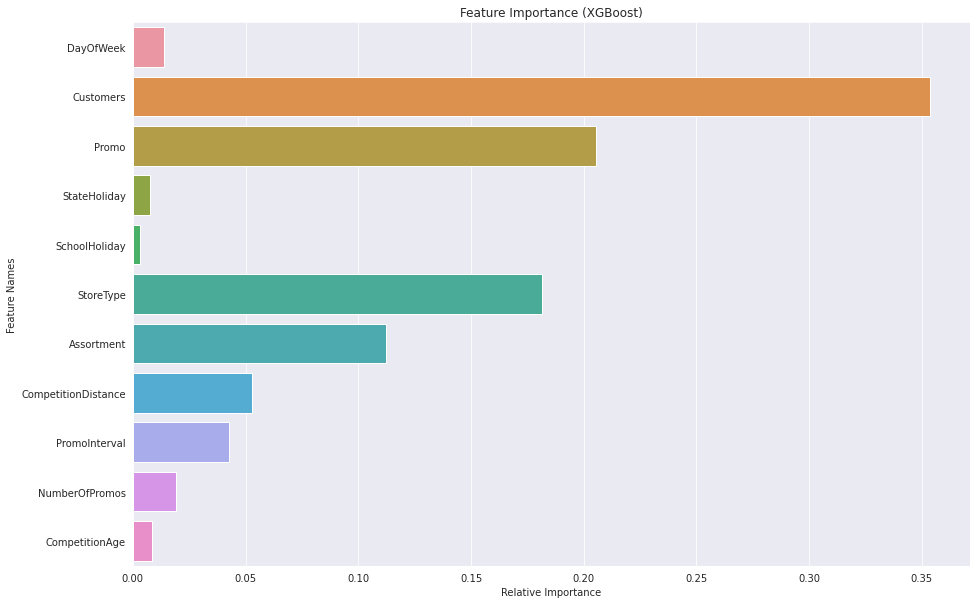

In [102]:
# Plot feature importances according to XGBoost.
fig = plt.figure(figsize=(15,10))
sns.barplot(xgb_reg.feature_importances_, feature_names)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')

The above plot shows Feature Importance of XGBoost from which we see that Customers and Promo columns have very high importance in predicting the Sales of the Stores, which is quite justified as they had very high correlation with the dependent variable Sales.

## Light GBM

In [103]:
# Install LightGBM.
!pip install lightgbm

# Import LGBMRegressor.
import lightgbm as lgb

In [104]:
# Fitting LightGBM regressor model with default parameters.

def lgbm_regressor(data, X_train, X_test, y_train, y_test):

  # Instantiate lgbm_reg object from LGBMRegressor class.
  lgbm_reg = lgb.LGBMRegressor(random_state=123, n_jobs=-1, verbosity=1)

  # Fit the model on the training data.
  lgbm_reg.fit(X_train, y_train)

  # Predict the dependent variable for X_train.
  y_pred_train = lgbm_reg.predict(X_train)

  # Predict the dependent variable for X_test.
  y_pred_test = lgbm_reg.predict(X_test)

  # Compute the metrics scores for LGBM Regressor.
  metrics = calc_metric(data=data, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

  # Default LGBM parameters used.
  print(lgbm_reg.get_params())

  # Print metric scores.
  print(metrics)

In [105]:
# Compute the metric scores for LGBM Regressor.
lgbm_regressor(data=rossmann_df_final, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbosity': 1}
Mean Squared Error for train set is 753283.7942213528 and test set is 763100.1006273439.
Root Mean Squared Error for train set is 867.9192325449142 and test set is 873.5560088668293.
Mean Absolute Error for train set is 632.5078554257457 and test set is 635.5670589816034.
R2 Score for train set is 0.9216410689058004 and test set is 0.9214574839940635.
Adjusted R2 Score for train set is 0.9216396768047652 and test set is 0.9214519022215837.


The above metrics calculated are for the default LightGBM Model. Next, I will fine tune the default LightGBM model using hyperparameter tuning.

### LightGBM Hyperparameter Tuning

In [106]:
# Function to compute hyperparameter optimisation of LGBMRegressor.

def lgbm_reg_hyperparameter(data, X_train, y_train, X_test, y_test, n_estimators, learning_rate, max_depth):

  # Instantiate a xgb_regressor object from LGBMRegressor class.
  lgbm_reg_hp = lgb.LGBMRegressor(random_state=123, n_jobs=-1, verbosity=1)

  # Run BayesSearchCV on the xgb_regressor with hyperparameters.
  lgbm_bayes = BayesSearchCV(estimator=lgbm_reg_hp,
                        search_spaces = {
                          'max_depth': max_depth,
                          'n_estimators': n_estimators,
                          'learning_rate': learning_rate
                        },
                        verbose=3, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, n_iter=3)
  
  # Fit the model.
  lgbm_bayes.fit(X_train, y_train)

  # Predict the dependent variable for X_train.
  y_pred_train = lgbm_bayes.predict(X_train)

  # Predict the dependent variable for X_test.
  y_pred_test = lgbm_bayes.predict(X_test)

  # Best Estimator.
  print('The best estimator for the lgbm model is {}.'.format(lgbm_bayes.best_estimator_))

  # Best Score.
  print('The best score for the best lgbm model is {}.'.format(lgbm_bayes.best_score_))

  # Best Parameters.
  print('The best parameters for the lgbm model is {}.'.format(lgbm_bayes.best_params_))

In [107]:
# XGBoost Regressor with Hyperparameter Tuning.
lgbm_reg_hyperparameter(data=rossmann_df_final, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, n_estimators=[600,800,1000], learning_rate=[0.01,0.1], max_depth=[5,7,9])

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished


The best estimator for the lgbm model is LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.08683097617990629,
              max_depth=9, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=800, n_jobs=-1, num_leaves=31,
              objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbosity=1).
The best score for the best lgbm model is -10.3758023471474.
The best parameters for the lgbm model is OrderedDict([('learning_rate', 0.08683097617990629), ('max_depth', 9), ('n_estimators', 800)]).


The above code cell's output shows the best hyperparameters for the LightGBM model for the given dataset. It's very fast compared to XGBoost, and now I will fit the best hyperparameters in the LightGBM model. 

### Fitting the best parameters we got using the hyperparameter tuning.

In [121]:
# Fitting LGBM model with best determined parameters.

# Instantiate xgb_regressor object from LGBMRegressor class.
lgbm_reg = lgb.LGBMRegressor(learning_rate=0.08, max_depth=9, n_estimators=800, random_state=123, n_jobs=-1, verbosity=1)

# Fit the model on the training data.
lgbm_reg.fit(X_train, y_train)

# Predict the dependent variable for X_train.
y_pred_train = lgbm_reg.predict(X_train)

# Predict the dependent variable for X_test.
y_pred_test = lgbm_reg.predict(X_test)

# Compute the metrics scores for LGBM Regressor.
metrics = calc_metric(data=rossmann_df_final, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

# LGBM parameters used.
print(lgbm_reg.get_params())

# Print metric scores.
print(metrics)

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.08, 'max_depth': 9, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 800, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbosity': 1}
Mean Squared Error for train set is 332920.47532389173 and test set is 346044.24699973466.
Root Mean Squared Error for train set is 576.9926128850279 and test set is 588.25525666987.
Mean Absolute Error for train set is 405.5530194846579 and test set is 410.91861895044906.
R2 Score for train set is 0.9653685731913049 and test set is 0.9643831971894711.
Adjusted R2 Score for train set is 0.965367957939866 and test set is 0.9643806660140026.


Text(0, 0.5, 'Feature Names')

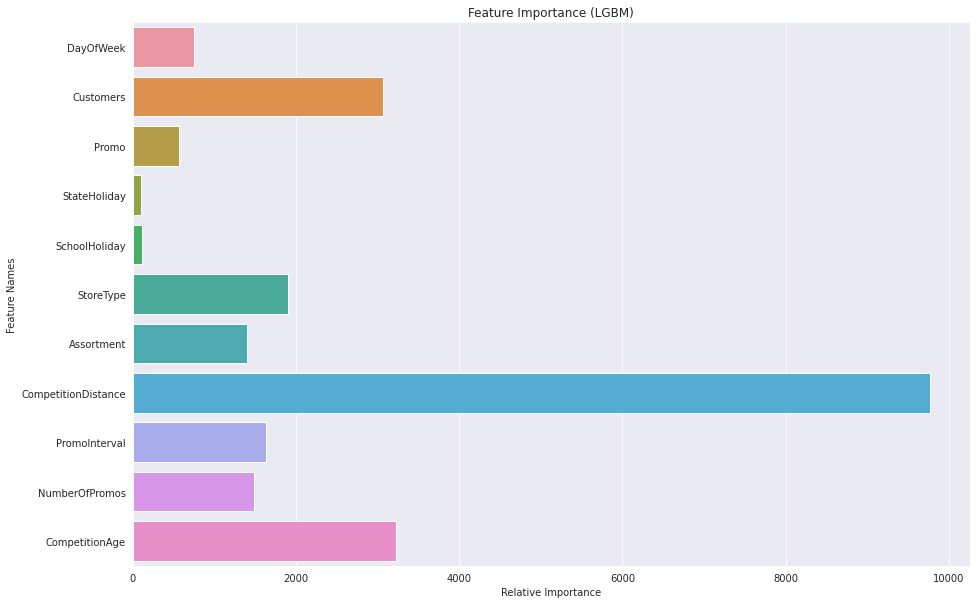

In [122]:
# Plot feature importances according to LGBM.
fig = plt.figure(figsize=(15,10))
sns.barplot(lgbm_reg.feature_importances_, feature_names)
plt.title('Feature Importance (LGBM)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')

The above plot shows Feature Importance of LightGBM from which we see that as opposed to XGBoost CompetitionDistance, CompetitionAge and Customer columns have very high importance in predicting the Sales of the Stores.

## CatBoost

In [110]:
# Install CatBoost.
!pip install catboost

# Import CatBoostRegressor from catboost.
from catboost import CatBoostRegressor

     |████████████████████████████████| 67.4 MB 29 kB/s 


For CatBoost I will fit the data without handling Categorical variables, as the algorithm itself is capable of selecting the best encoding method for the categorical columns.

In [111]:
# Split the dataset into Independent and Dependent variables.
X_cat = rossmann_df_final_catboost.iloc[:, :-1]
y_cat = rossmann_df_final_catboost.iloc[:, -1]

# Use square-root transform onthe dependent variable.
y_cat = np.sqrt(y_cat)

In [112]:
# Train - test split of the data.
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size = 0.2, random_state = 123)

In [113]:
# Fitting catboost regressor model with default parameters.

def catboost_regressor(data, X_train, X_test, y_train, y_test):

  # Instantiate catboost_regressor_cat object from CatBoostRegressor class.

  ''' The argument inside CatBoostRegressor which is cat_features contains
  the indexes of the categorical columns in the dataset which are to be encoded
  by the algorithm.'''

  catboost_reg = CatBoostRegressor(cat_features=[3, 5, 6, 8], random_state=123)

  # Fit the model on the training data.
  catboost_reg.fit(X_train_cat, y_train_cat)

  # Predict the dependent variable for X_train.
  y_pred_train_cat = catboost_reg.predict(X_train_cat)

  # Predict the dependent variable for X_test.
  y_pred_test_cat = catboost_reg.predict(X_test_cat)

  # Compute the metrics scores for LGBM Regressor.
  metrics = calc_metric(data=data, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred_train=y_pred_train_cat, y_pred_test=y_pred_test_cat)

  # Default LGBM parameters used.
  print(catboost_reg.get_params())

  # Print metric scores.
  print(metrics)

In [114]:
catboost_regressor(data=rossmann_df_final_catboost, X_train=X_train_cat, X_test=X_test_cat, y_train=y_train_cat, y_test=y_test_cat)

Learning rate set to 0.124472
0:	learn: 15.9176104	total: 812ms	remaining: 13m 30s
1:	learn: 14.6066779	total: 1.5s	remaining: 12m 26s
2:	learn: 13.4906795	total: 2.18s	remaining: 12m 3s
3:	learn: 12.5433342	total: 2.82s	remaining: 11m 42s
4:	learn: 11.7283038	total: 3.43s	remaining: 11m 22s
5:	learn: 11.0338719	total: 4.07s	remaining: 11m 14s
6:	learn: 10.4811833	total: 4.62s	remaining: 10m 55s
7:	learn: 9.9372828	total: 5.26s	remaining: 10m 52s
8:	learn: 9.4840520	total: 5.75s	remaining: 10m 33s
9:	learn: 9.1068554	total: 6.23s	remaining: 10m 16s
10:	learn: 8.7963419	total: 6.79s	remaining: 10m 10s
11:	learn: 8.5046039	total: 7.35s	remaining: 10m 5s
12:	learn: 8.1650376	total: 7.82s	remaining: 9m 53s
13:	learn: 7.8866222	total: 8.24s	remaining: 9m 40s
14:	learn: 7.6592592	total: 8.74s	remaining: 9m 34s
15:	learn: 7.4620977	total: 9.18s	remaining: 9m 24s
16:	learn: 7.3062204	total: 9.73s	remaining: 9m 22s
17:	learn: 7.1791921	total: 10.3s	remaining: 9m 19s
18:	learn: 7.0534873	total: 

### CatBoost Hyperparameter Tuning

In [125]:
# Function to compute hyperparameter optimisation of CatBoostRegressor.

def catboost_reg_hyperparameter(data, cat_features, X_train, y_train, X_test, y_test, n_estimators, learning_rate, max_depth):

  # Instantiate a catboost_regressor object from CatBoostRegressor class.
  catboost_reg_hp = CatBoostRegressor(cat_features=cat_features,random_state=123)

  # Run BayesSearchCV on the catboost_regressor with hyperparameters.
  catboost_bayes = BayesSearchCV(estimator=catboost_reg_hp,
                        search_spaces = {
                          'max_depth': max_depth,
                          'n_estimators': n_estimators,
                          'learning_rate': learning_rate
                        },
                        verbose=3, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, n_iter=3)
  
  # Fit the model.
  catboost_bayes.fit(X_train, y_train)

  # Predict the dependent variable for X_train.
  y_pred_train = catboost_bayes.predict(X_train)

  # Predict the dependent variable for X_test.
  y_pred_test = catboost_bayes.predict(X_test)

  # Best Estimator.
  print('The best estimator for the catboost model is {}.'.format(catboost_bayes.best_estimator_))

  # Best Score.
  print('The best score for the best catboost model is {}.'.format(catboost_bayes.best_score_))

  # Best Parameters.
  print('The best parameters for the catboost model is {}.'.format(catboost_bayes.best_params_))

In [126]:
# CatBoost Regressor with Hyperparameter Tuning.
catboost_reg_hyperparameter(data=rossmann_df_final_catboost, cat_features=[3, 5, 6, 8], X_train=X_train_cat, X_test=X_test_cat, y_train=y_train_cat, y_test=y_test_cat, n_estimators=[600,800,1000], learning_rate=[0.01,0.1], max_depth=[5,7,9])

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 21.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 17.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 12.3min finished
Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 16.5025654	total: 785ms	remaining: 13m 3s
1:	learn: 15.6374037	total: 1.53s	remaining: 12m 41s
2:	learn: 14.8457431	total: 2.29s	remaining: 12m 42s
3:	learn: 14.1208335	total: 3.05s	remaining: 12m 39s
4:	learn: 13.4777384	total: 3.77s	remaining: 12m 30s
5:	learn: 12.8878421	total: 4.49s	remaining: 12m 24s
6:	learn: 12.3465228	total: 5.22s	remaining: 12m 21s
7:	learn: 11.8388658	total: 5.95s	remaining: 12m 18s
8:	learn: 11.3737325	total: 6.5s	remaining: 11m 55s
9:	learn: 10.9521697	total: 7.16s	remaining: 11m 48s
10:	learn: 10.5697371	total: 7.71s	remaining: 11m 33s
11:	learn: 10.2274182	total: 8.23s	remaining: 11m 17s
12:	learn: 9.8907139	total: 8.96s	remaining: 11m 20s
13:	learn: 9.5512620	total: 9.61s	remaining: 11m 16s
14:	learn: 9.2462632	total: 10.1s	remaining: 11m 6s
15:	learn: 8.9652841	total: 10.7s	remaining: 10m 59s
16:	learn: 8.7146804	total: 11.3s	remaining: 10m 53s
17:	learn: 8.4851577	total: 11.8s	remaining: 10m 41s
18:	learn: 8.2822450	total: 12.3s	remaining: 10

### Fitting the best parameters we got using the hyperparameter tuning.

In [128]:
# Fitting CatBoost model with best determined parameters.

# Instantiate xgb_regressor object from CatBoostRegressor class.
catboost_reg = CatBoostRegressor(cat_features=[3, 5, 6, 8], learning_rate=0.07, max_depth=7, n_estimators=1000, random_state=123)

# Fit the model on the training data.
catboost_reg.fit(X_train_cat, y_train_cat)

# Predict the dependent variable for X_train.
y_pred_train = catboost_reg.predict(X_train_cat)

# Predict the dependent variable for X_test.
y_pred_test = catboost_reg.predict(X_test_cat)

# Compute the metrics scores for CatBoostRegressor.
metrics = calc_metric(data=rossmann_df_final_catboost, X_train=X_train_cat, X_test=X_test_cat, y_train=y_train_cat, y_test=y_test_cat, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

# CatBoostRegressor parameters used.
print(catboost_reg.get_params())

# Print metric scores.
print(metrics)

0:	learn: 16.5619007	total: 794ms	remaining: 13m 13s
1:	learn: 15.7459746	total: 1.57s	remaining: 13m 2s
2:	learn: 14.9949054	total: 2.4s	remaining: 13m 18s
3:	learn: 14.3053974	total: 3.2s	remaining: 13m 16s
4:	learn: 13.6852384	total: 3.96s	remaining: 13m 8s
5:	learn: 13.1123636	total: 4.77s	remaining: 13m 10s
6:	learn: 12.5872412	total: 5.57s	remaining: 13m 9s
7:	learn: 12.1034453	total: 6.39s	remaining: 13m 12s
8:	learn: 11.6609013	total: 7.1s	remaining: 13m 1s
9:	learn: 11.2446172	total: 7.87s	remaining: 12m 58s
10:	learn: 10.8591547	total: 8.56s	remaining: 12m 49s
11:	learn: 10.5071703	total: 9.13s	remaining: 12m 31s
12:	learn: 10.1845712	total: 9.69s	remaining: 12m 15s
13:	learn: 9.8947487	total: 10.3s	remaining: 12m 2s
14:	learn: 9.6257291	total: 10.9s	remaining: 11m 56s
15:	learn: 9.3836663	total: 11.5s	remaining: 11m 46s
16:	learn: 9.1608330	total: 12.1s	remaining: 11m 39s
17:	learn: 8.9359308	total: 12.8s	remaining: 11m 37s
18:	learn: 8.6909141	total: 13.3s	remaining: 11m 28

Text(0, 0.5, 'Feature Names')

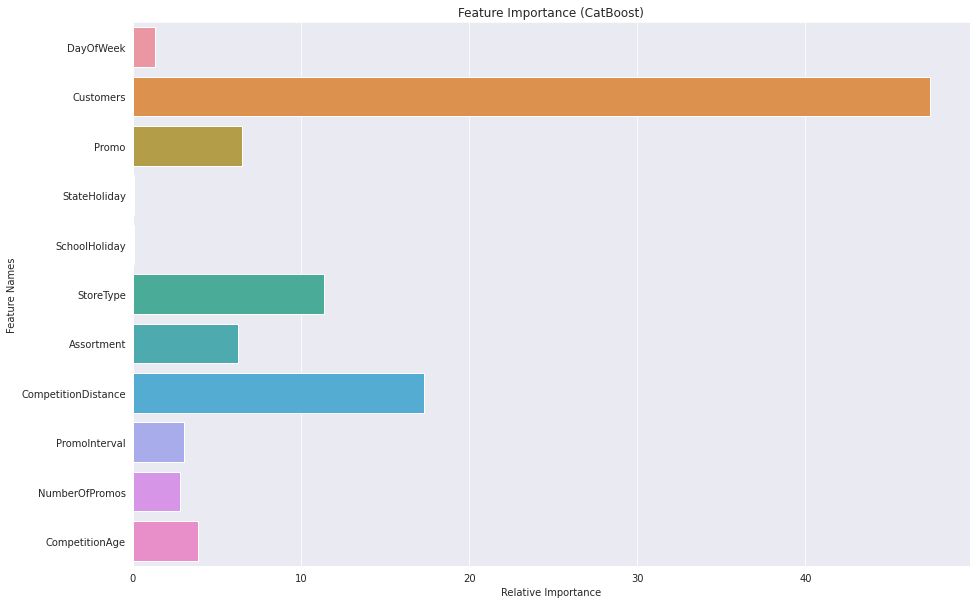

In [129]:
# Plot feature importances according to LGBM.
fig = plt.figure(figsize=(15,10))
sns.barplot(catboost_reg.feature_importances_, feature_names)
plt.title('Feature Importance (CatBoost)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')

The above plot shows Feature Importance of CatBoost from which we see that CompetitionDistance and Customer columns have very high importance in predicting the Sales of the Stores.

Given the three models that are ***XGBOOST, LIGHTGBM, CATBOOST*** were tuned using hyper parameters so, I will compare between those three as opposed to ***Linear regression and Decision Trees*** as we have seen that Linear Regression does not provide a good R2 score as it underfits the data whereas Decision Tree though provides a good R2 score heavily ovrefits the data.


From the three boosting models used ***LightGBM*** would be my pick of the three algorithms as it takes considerably very less time to run and provides the very good R2 score as compared to the other two.

So, for analysis feature importance using Shap values I will use the LightGBM model's feature importance.

## Shap

In [139]:
!pip install shap
# Import shap
import shap
shap.initjs()

     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491651 sha256=311f6e28b537f6d606a6f153bcdcc0b1110ffe132660fc85b745c7fa897524e3
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [137]:
importances = lgbm_reg.feature_importances_

importance_dict = {'Feature' : feature_names,
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
7,CompetitionDistance,9768
10,CompetitionAge,3231
1,Customers,3064
5,StoreType,1899
8,PromoInterval,1630
9,NumberOfPromos,1479
6,Assortment,1393
0,DayOfWeek,750
2,Promo,571
4,SchoolHoliday,109


In [140]:
X_shap = X_train
explainer = shap.TreeExplainer(lgbm_reg)
shap_values = explainer.shap_values(X_shap)

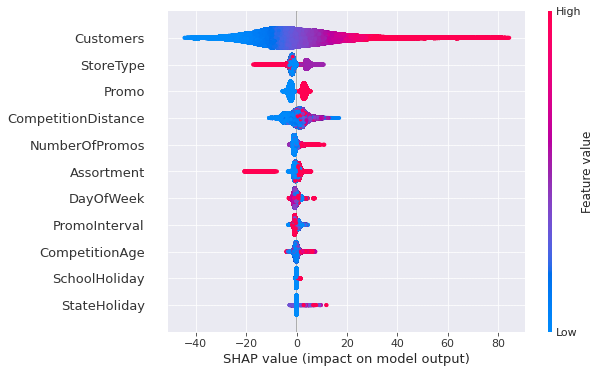

In [150]:
shap.summary_plot(shap_values, X_shap, feature_names=feature_names, plot_type='dot')

In [155]:
top_vars = ['Customers', 'StoreType', 'Promo', 'CompetitionDistance', 'NumberOfPromos']
for elem in top_vars:
    shap.dependence_plot(elem, shap_values[1], X_train)

IndexError: ignored

In [ ]:
X_shap = X_test
explainer = shap.TreeExplainer(lgbm_reg)
shap_values = explainer.shap_values(X_shap)

In [ ]:
shap.summary_plot(shap_values, X_shap, plot_type='dot')